In [223]:
import pandas as pd

# Building a Robust Calendar

In [224]:
datesfull = pd.date_range("2020-01-01", "2025-12-31") #freq =  period =
dfdates = pd.DataFrame({"date": datesfull}).set_index("date")

In [225]:
dfdates = dfdates.assign(
    year=dfdates.index.year,
    quarter=dfdates.index.quarter,
    month=dfdates.index.month,
    month_name=dfdates.index.month_name(),
    day=dfdates.index.day,
    day_of_week=dfdates.index.dayofweek,   # Monday=0
    day_name=dfdates.index.day_name(),
    day_of_year=dfdates.index.dayofyear,
    week_iso=dfdates.index.isocalendar().week,
    is_month_start=dfdates.index.is_month_start,
    is_month_end=dfdates.index.is_month_end,
)

In [226]:
dfdates

,year,quarter,month,month_name,day,day_of_week,day_name,day_of_year,week_iso,is_month_start,is_month_end
date,,,,,,,,,,,
2020-01-01,2020,1,1,January,1,2,Wednesday,1,1,True,False
2020-01-02,2020,1,1,January,2,3,Thursday,2,1,False,False
2020-01-03,2020,1,1,January,3,4,Friday,3,1,False,False
2020-01-04,2020,1,1,January,4,5,Saturday,4,1,False,False
2020-01-05,2020,1,1,January,5,6,Sunday,5,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,2025,4,12,December,27,5,Saturday,361,52,False,False
2025-12-28,2025,4,12,December,28,6,Sunday,362,52,False,False
2025-12-29,2025,4,12,December,29,0,Monday,363,1,False,False


In [227]:
def week_of_quarter(ts):
    quarter_start = ts.to_period("Q").start_time
    return ((ts - quarter_start).days // 7) + 1

dfdates["week_of_month"] = dfdates.index.to_series().apply(lambda d: (d.day - 1) // 7 + 1)
dfdates["week_of_quarter"] = dfdates.index.to_series().apply(week_of_quarter)

In [228]:
dfdates

,year,quarter,month,month_name,day,day_of_week,day_name,day_of_year,week_iso,is_month_start,is_month_end,week_of_month,week_of_quarter
date,,,,,,,,,,,,,
2020-01-01,2020,1,1,January,1,2,Wednesday,1,1,True,False,1,1
2020-01-02,2020,1,1,January,2,3,Thursday,2,1,False,False,1,1
2020-01-03,2020,1,1,January,3,4,Friday,3,1,False,False,1,1
2020-01-04,2020,1,1,January,4,5,Saturday,4,1,False,False,1,1
2020-01-05,2020,1,1,January,5,6,Sunday,5,1,False,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,2025,4,12,December,27,5,Saturday,361,52,False,False,4,13
2025-12-28,2025,4,12,December,28,6,Sunday,362,52,False,False,4,13
2025-12-29,2025,4,12,December,29,0,Monday,363,1,False,False,5,13


In [229]:
dow_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
dfdates["month_name"] = pd.Categorical(dfdates["month_name"], categories=month_order, ordered=True)
dfdates["day_name"] = pd.Categorical(dfdates["day_name"], categories=dow_order, ordered=True)

## What about holidays or other special days?

In [230]:
specialdays = {"2021-02-14","2021-11-26","2021-12-24","2021-12-25","2021-07-04","2021-12-31"}
specialdays = {f"{y}-{m}" for y in range(2020,2026) for m in ["02-14","11-26","12-24","12-25","07-04","12-31"]}
dfdates["is_special"] = dfdates.index.strftime("%Y-%m-%d").isin(specialdays).astype(int)

In [231]:
dfdates[dfdates.is_special==1]

,year,quarter,month,month_name,day,day_of_week,day_name,day_of_year,week_iso,is_month_start,is_month_end,week_of_month,week_of_quarter,is_special
date,,,,,,,,,,,,,,
2020-02-14,2020,1,2,February,14,4,Friday,45,7,False,False,2,7,1
2020-07-04,2020,3,7,July,4,5,Saturday,186,27,False,False,1,1,1
2020-11-26,2020,4,11,November,26,3,Thursday,331,48,False,False,4,9,1
2020-12-24,2020,4,12,December,24,3,Thursday,359,52,False,False,4,13,1
2020-12-25,2020,4,12,December,25,4,Friday,360,52,False,False,4,13,1
2020-12-31,2020,4,12,December,31,3,Thursday,366,53,False,True,5,14,1
2021-02-14,2021,1,2,February,14,6,Sunday,45,6,False,False,2,7,1
2021-07-04,2021,3,7,July,4,6,Sunday,185,26,False,False,1,1,1
2021-11-26,2021,4,11,November,26,4,Friday,330,47,False,False,4,9,1


In [232]:
import holidays
us_holidays = holidays.US()
us_holidays_2021 = pd.DataFrame(sorted(holidays.US(years = range(2021,2026)).items()), columns=["date","name"])
us_holidays_2021

,date,name
0,2021-01-01,New Year's Day
1,2021-01-18,Martin Luther King Jr. Day
2,2021-02-15,Washington's Birthday
3,2021-05-31,Memorial Day
4,2021-06-18,Juneteenth National Independence Day (observed)
...,...,...
58,2025-09-01,Labor Day
59,2025-10-13,Columbus Day
60,2025-11-11,Veterans Day
61,2025-11-27,Thanksgiving Day


In [233]:
dfdates["holiday_name"] = dfdates.index.map(lambda d: us_holidays.get(d, None))

In [234]:
dfdates

,year,quarter,month,month_name,day,day_of_week,day_name,day_of_year,week_iso,is_month_start,is_month_end,week_of_month,week_of_quarter,is_special,holiday_name
date,,,,,,,,,,,,,,,
2020-01-01,2020,1,1,January,1,2,Wednesday,1,1,True,False,1,1,0,New Year's Day
2020-01-02,2020,1,1,January,2,3,Thursday,2,1,False,False,1,1,0,None
2020-01-03,2020,1,1,January,3,4,Friday,3,1,False,False,1,1,0,None
2020-01-04,2020,1,1,January,4,5,Saturday,4,1,False,False,1,1,0,None
2020-01-05,2020,1,1,January,5,6,Sunday,5,1,False,False,1,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,2025,4,12,December,27,5,Saturday,361,52,False,False,4,13,0,None
2025-12-28,2025,4,12,December,28,6,Sunday,362,52,False,False,4,13,0,None
2025-12-29,2025,4,12,December,29,0,Monday,363,1,False,False,5,13,0,None


In [235]:
dfdates[dfdates.holiday_name.notna()]

,year,quarter,month,month_name,day,day_of_week,day_name,day_of_year,week_iso,is_month_start,is_month_end,week_of_month,week_of_quarter,is_special,holiday_name
date,,,,,,,,,,,,,,,
2020-01-01,2020,1,1,January,1,2,Wednesday,1,1,True,False,1,1,0,New Year's Day
2020-01-20,2020,1,1,January,20,0,Monday,20,4,False,False,3,3,0,Martin Luther King Jr. Day
2020-02-17,2020,1,2,February,17,0,Monday,48,8,False,False,3,7,0,Washington's Birthday
2020-05-25,2020,2,5,May,25,0,Monday,146,22,False,False,4,8,0,Memorial Day
2020-07-03,2020,3,7,July,3,4,Friday,185,27,False,False,1,1,0,Independence Day (observed)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-01,2025,3,9,September,1,0,Monday,244,36,True,False,1,9,0,Labor Day
2025-10-13,2025,4,10,October,13,0,Monday,286,42,False,False,2,2,0,Columbus Day
2025-11-11,2025,4,11,November,11,1,Tuesday,315,46,False,False,2,6,0,Veterans Day


# Time Series Analysis

In [236]:
path = r'https://raw.githubusercontent.com/ncrowder/python/refs/heads/main/timeseries_full.csv'
df = pd.read_csv(path, parse_dates= ['date'])
# df["date"] = pd.to_datetime(df["date"]) if you forget on import
df.head()

,date,customers,coffee_sold,avg_sale,total_sales
0,2021-01-01,104,78,4.80,499.20
1,2021-01-02,118,97,4.78,564.04
2,2021-01-03,116,93,4.81,557.96
3,2021-01-04,102,71,4.77,486.54
4,2021-01-05,101,71,4.82,486.82


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         365 non-null    datetime64[ns]
 1   customers    365 non-null    int64         
 2   coffee_sold  365 non-null    int64         
 3   avg_sale     365 non-null    float64       
 4   total_sales  365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 14.4 KB


In [238]:
df = df.set_index("date")
df

,customers,coffee_sold,avg_sale,total_sales
date,,,,
2021-01-01,104,78,4.80,499.20
2021-01-02,118,97,4.78,564.04
2021-01-03,116,93,4.81,557.96
2021-01-04,102,71,4.77,486.54
2021-01-05,101,71,4.82,486.82
...,...,...,...,...
2021-12-27,109,76,4.80,523.20
2021-12-28,111,79,4.80,532.80
2021-12-29,114,84,4.81,548.34


## Visualization

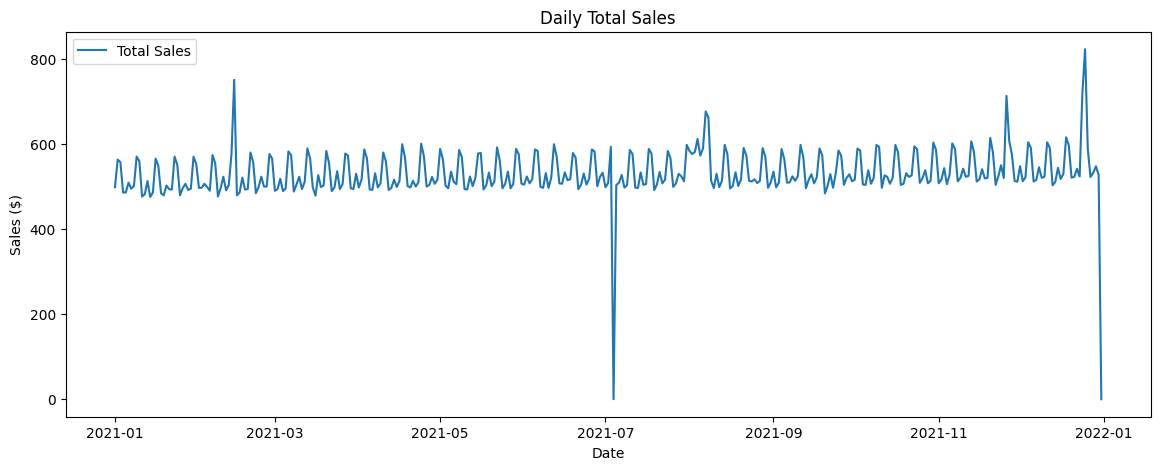

In [239]:
import matplotlib.pyplot as plt
# Plot raw time series
plt.figure(figsize=(14,5))
plt.plot(df["total_sales"], label="Total Sales")
plt.title("Daily Total Sales")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.legend()
plt.show()

/tmp/ipython-input-1332449432.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonality = df.groupby("day")["total_sales"].mean()


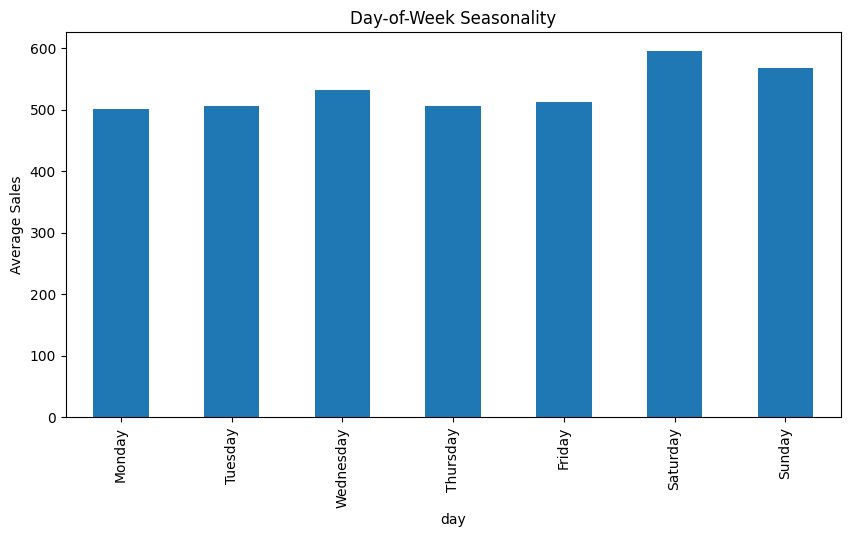

In [240]:
# Weekly seasonality (average by day of week)
df["day"] = df.index.day_name()

ordered_days = [
    "Monday", "Tuesday", "Wednesday", "Thursday",
    "Friday", "Saturday", "Sunday"
]

df["day"] = pd.Categorical(df["day"], categories=ordered_days, ordered=True)

seasonality = df.groupby("day")["total_sales"].mean()

seasonality.plot(kind="bar", figsize=(10,5), title="Day-of-Week Seasonality")
plt.ylabel("Average Sales")
plt.show()

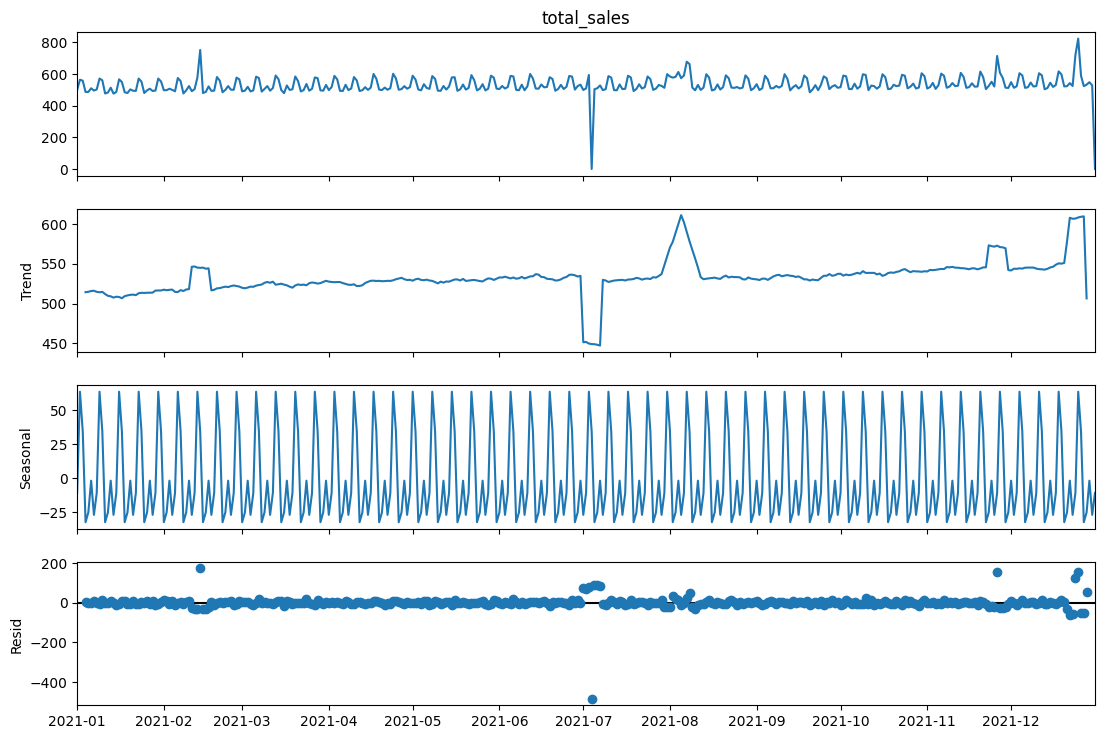

In [241]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Classical decomposition (additive)
result = seasonal_decompose(df["total_sales"], model="additive", period=7)

fig = result.plot()
fig.set_size_inches(12, 8)
plt.show()

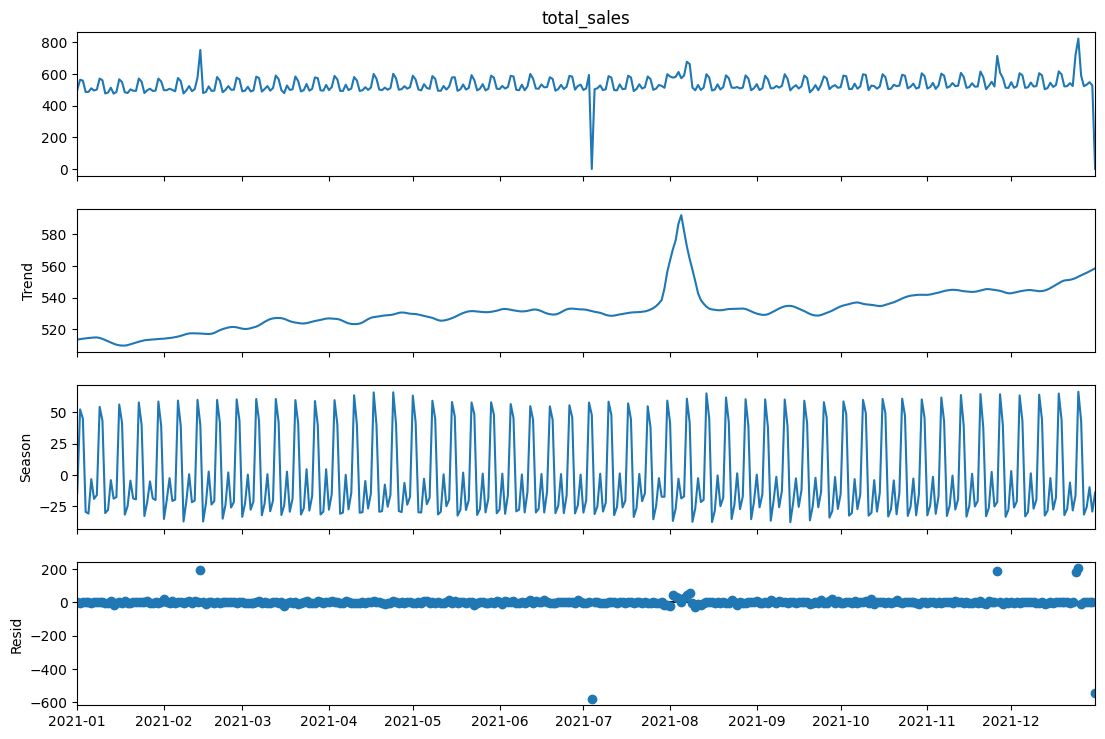

In [242]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

stl = STL(df["total_sales"], period=7, robust=True)
result = stl.fit()

fig = result.plot()
fig.set_size_inches(12, 8)
plt.show()

# Group Transformations, Resampling, Rolling and Exponentially Weighted Averages

In [243]:
# keeping track of the max up to that point (by day)
df['total_sales_dow_cummax'] = df.groupby('day')['total_sales'].transform('cummax')
#In this case, using as part of transform is actually optional because cummax returns a value for every row, actually all the cumulative (cum) functions do.
#Try changing to cummin and removing the transform part - still works.
#Try using plain 'ole sum without transform and it fails though, because in that case the result would a be a series with only 7 values (one for each day of the week)
df[df.day=='Friday']

/tmp/ipython-input-3935222066.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['total_sales_dow_cummax'] = df.groupby('day')['total_sales'].transform('cummax')


,customers,coffee_sold,avg_sale,total_sales,day,total_sales_dow_cummax
date,,,,,,
2021-01-01,104,78,4.80,499.20,Friday,499.20
2021-01-08,104,80,4.83,502.32,Friday,502.32
2021-01-15,101,75,4.82,486.82,Friday,502.32
2021-01-22,103,78,4.79,493.37,Friday,502.32
2021-01-29,103,79,4.81,495.43,Friday,502.32
2021-02-05,102,75,4.81,490.62,Friday,502.32
2021-02-12,104,78,4.85,504.40,Friday,504.40
2021-02-19,102,77,4.85,494.70,Friday,504.40
2021-02-26,103,79,4.86,500.58,Friday,504.40


| Operation       | Meaning                        |
| --------------- | ------------------------------ |
| `resample("W")` | Group by week                  |
| `resample("M")` | Group by month                 |
| `resample("Q")` | Group by quarter               |
| `resample("A")` | Group by year                  |
| Downsampling    | Requires aggregation           |
| Upsampling      | Creates new rows + fill method |


In [244]:
weekly = df["total_sales"].resample("W").sum()
monthly = df["total_sales"].resample("ME").sum()

print("Weekly totals:\n", weekly.head(), "\n")
print("Monthly totals:\n", monthly.head(), "\n")

Weekly totals:
 date
2021-01-03    1621.20
2021-01-10    3612.37
2021-01-17    3552.27
2021-01-24    3578.48
2021-01-31    3596.25
Freq: W-SUN, Name: total_sales, dtype: float64 

Monthly totals:
 date
2021-01-31    15960.57
2021-02-28    14713.72
2021-03-31    16179.02
2021-04-30    15777.59
2021-05-31    16472.81
Freq: ME, Name: total_sales, dtype: float64 



In [245]:
# Create rolling averages for smoothing
df["MA7"] = df["total_sales"].rolling(window = 7, min_periods = 1).mean() #include window = AND min_periods = if you want to avoid the NaN values...
df["MA30"] = df["total_sales"].rolling(30).mean()
df.head(n=31)

,customers,coffee_sold,avg_sale,total_sales,day,total_sales_dow_cummax,MA7,MA30
date,,,,,,,,
2021-01-01,104,78,4.80,499.20,Friday,499.20,499.200000,NaN
2021-01-02,118,97,4.78,564.04,Saturday,564.04,531.620000,NaN
2021-01-03,116,93,4.81,557.96,Sunday,557.96,540.400000,NaN
2021-01-04,102,71,4.77,486.54,Monday,486.54,526.935000,NaN
2021-01-05,101,71,4.82,486.82,Tuesday,486.82,518.912000,NaN
2021-01-06,106,77,4.81,509.86,Wednesday,509.86,517.403333,NaN
2021-01-07,103,74,4.81,495.43,Thursday,495.43,514.264286,NaN
2021-01-08,104,80,4.83,502.32,Friday,502.32,514.710000,NaN
2021-01-09,118,98,4.84,571.12,Saturday,571.12,515.721429,NaN


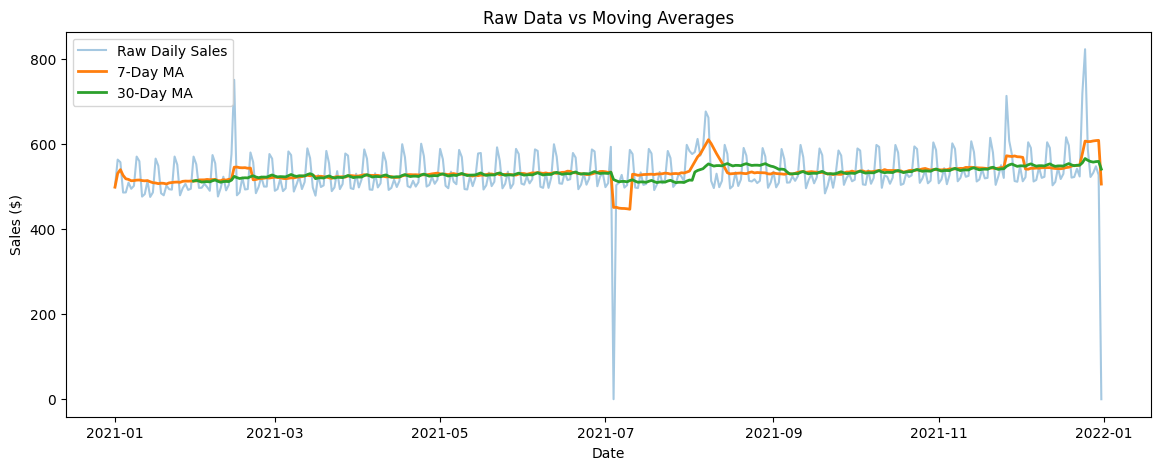

In [246]:
plt.figure(figsize=(14,5))
plt.plot(df["total_sales"], label="Raw Daily Sales", alpha=0.4)
plt.plot(df["MA7"], label="7-Day MA", linewidth=2)
plt.plot(df["MA30"], label="30-Day MA", linewidth=2)
plt.title("Raw Data vs Moving Averages")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.legend()
plt.show()

Exponential smoothing is a type of moving average where recent data gets more weight than older data.
The amount of smoothing is controlled by α (between 0 and 1). The most recent observation is weighted by α, and each earlier observation receives exponentially smaller weight α(1−α)ⁿ, where n counts how far back the observation is. Because the weights shrink exponentially, older values never disappear but quickly become negligible.

In [247]:
# Exponential smoothing
df["EWMA_0.2"] = df["total_sales"].ewm(alpha=0.2).mean()
df["EWMA_0.05"] = df["total_sales"].ewm(alpha=0.05).mean()
df.head()

,customers,coffee_sold,avg_sale,total_sales,day,total_sales_dow_cummax,MA7,MA30,EWMA_0.2,EWMA_0.05
date,,,,,,,,,,
2021-01-01,104,78,4.80,499.20,Friday,499.20,499.200,NaN,499.200000,499.200000
2021-01-02,118,97,4.78,564.04,Saturday,564.04,531.620,NaN,535.222222,532.451282
2021-01-03,116,93,4.81,557.96,Sunday,557.96,540.400,NaN,544.540984,541.393865
2021-01-04,102,71,4.77,486.54,Monday,486.54,526.935,NaN,524.892954,526.607958
2021-01-05,101,71,4.82,486.82,Tuesday,486.82,518.912,NaN,513.567111,517.813837


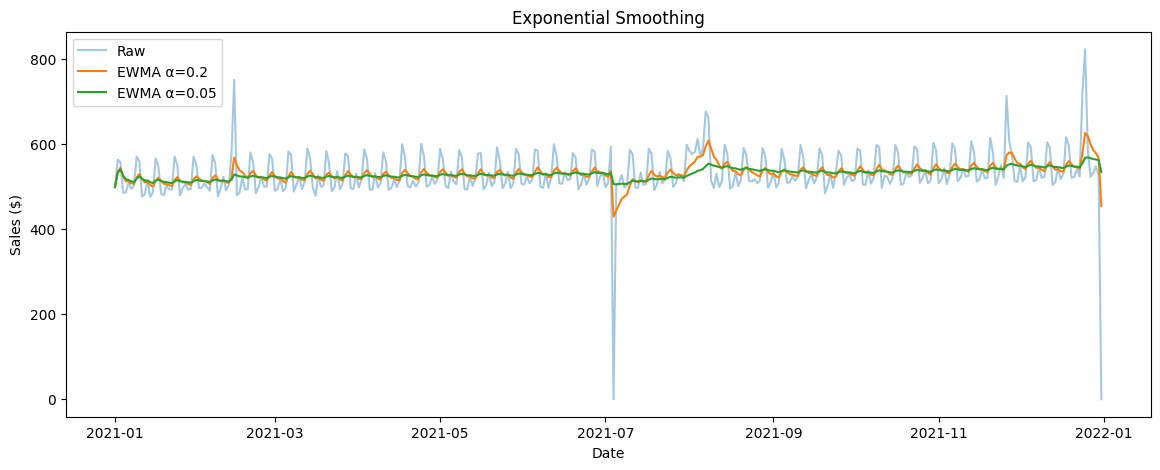

In [248]:
plt.figure(figsize=(14,5))
plt.plot(df["total_sales"], alpha=0.4, label="Raw")
plt.plot(df["EWMA_0.2"], label="EWMA α=0.2")
plt.plot(df["EWMA_0.05"], label="EWMA α=0.05")
plt.title("Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.legend()
plt.show()

## Forecasting (one-step ahead)

In [249]:
import numpy as np
# PARAMETERS
roll_window = 7     # user-specified rolling window
alpha = 0.2         # user-specified EWMA smoothing factor

# ensure sorted
df = df.sort_index()

# Create containers for forecasts
running_mean_forecast = []
rolling_mean_forecast = []
ewma_forecast = []

dates = df.index

# We'll start predicting from the SECOND MONTH
start_date = df.index[df.index.month == df.index[0].month][0]  # first day of month 1
first_month = df.index[0].month
prediction_start = df.index[df.index.month == (first_month + 1)][0]

for current_day in df.index:
    if current_day < prediction_start:
        # no forecast for first month
        running_mean_forecast.append(np.nan)
        rolling_mean_forecast.append(np.nan)
        ewma_forecast.append(np.nan)
        continue

    # historical data available up to yesterday
    previous_day = current_day - pd.Timedelta(days=1)
    history = df.loc[:previous_day]["total_sales"]

    # Running mean (expanding window)
    run_mean = history.mean()

    # Rolling mean
    if len(history) >= roll_window:
        roll_mean = history.tail(roll_window).mean()
    else:
        roll_mean = history.mean() #use the history we have if not the full window size

    # Exponentially weighted mean (EWMA)
    ewma = history.ewm(alpha=alpha).mean().iloc[-1]

    running_mean_forecast.append(run_mean)
    rolling_mean_forecast.append(roll_mean)
    ewma_forecast.append(ewma)

# Add predictions to dataframe
df["pred_running"] = running_mean_forecast
df["pred_roll"] = rolling_mean_forecast
df["pred_ewma"] = ewma_forecast

<Axes: xlabel='date'>

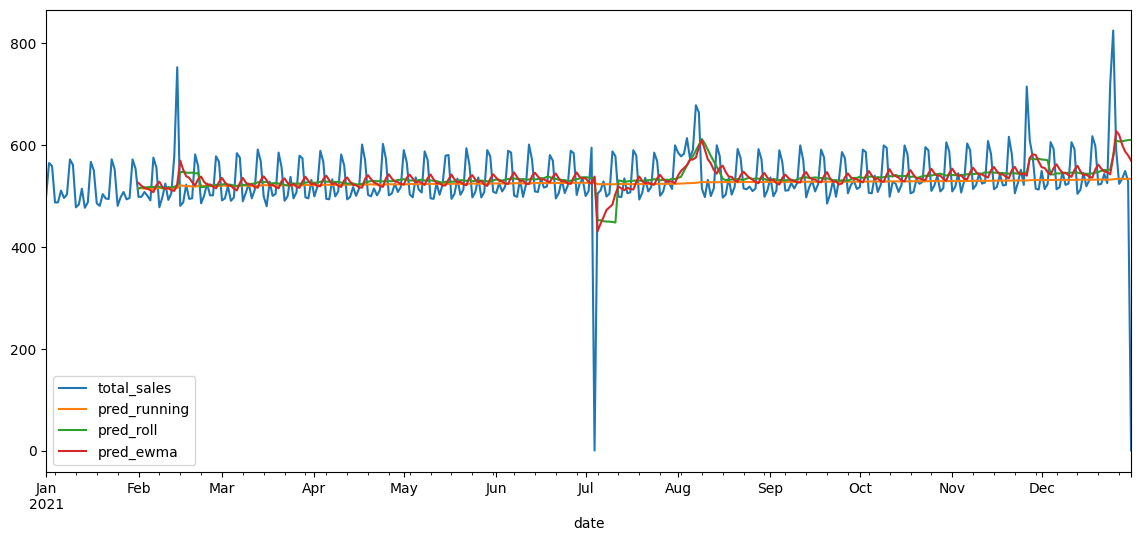

In [250]:
df[["total_sales", "pred_running", "pred_roll", "pred_ewma"]].plot(figsize=(14,6))

## Measuring Errors (Performance)

In [251]:
import numpy as np
errors = df["total_sales"] - df["pred_ewma"]

MAE  = errors.abs().mean()
MAPE = (errors.abs() / df["total_sales"]).replace([np.inf,np.nan],0).mean() * 100
RMSE = np.sqrt((errors**2).mean())
Bias = errors.mean()

print(MAE, MAPE, RMSE, Bias)

38.72163082496834 5.868840620635947 63.057788993049414 -1.045189683504986


## New Data?

In [291]:
def append_new_timeseries(existing_df, new_df, date_col="date"):
    # Parse date column into datetime
    if new_df[date_col].dtype != "datetime64[ns]":
        new_df[date_col] = pd.to_datetime(new_df[date_col], infer_datetime_format=True, errors="coerce")

    # Identify rows with invalid date parsing
    bad_dates = new_df[new_df[date_col].isna()]
    if len(bad_dates) > 0:
        print(f"\nWARNING: {len(bad_dates)} rows had unparseable dates and were dropped:")
        print(bad_dates)
        new_df = new_df.dropna(subset=[date_col])

    # Set datetime index
    new_df = new_df.set_index(date_col)

    # Align columns to existing dataset
    needed_cols = existing_df.columns
    new_cols = new_df.columns

    missing_cols = set(needed_cols) - set(new_cols)
    extra_cols = set(new_cols) - set(needed_cols)

    if missing_cols:
        print(f"\nMissing columns in new data (filled with NaN): {missing_cols}")
        for col in missing_cols:
            new_df[col] = pd.NA

    if extra_cols:
        print(f"\nExtra columns in new data (dropped): {extra_cols}")

    new_df = new_df.reindex(columns=needed_cols)

    # Track timestamps BEFORE appending
    existing_dates = set(existing_df.index)
    new_dates = set(new_df.index)

    overlapping_dates = existing_dates.intersection(new_dates)
    new_only_dates = new_dates - existing_dates

    # Append
    combined = pd.concat([existing_df, new_df])

    # Sort chronologically
    combined = combined.sort_index()

    # Remove duplicate timestamps (keep newest rows)
    duplicate_mask = combined.index.duplicated(keep="last")
    duplicate_dates_removed = combined.index[duplicate_mask]

    if len(duplicate_dates_removed) > 0:
        print(f"\nDuplicate timestamps replaced (kept last version):")
        print(list(duplicate_dates_removed))

    combined = combined[~duplicate_mask]

    # Diagnostics
    print("\n=== Append Summary ===")
    print(f"Rows in existing dataset: {len(existing_df)}")
    print(f"Rows in new dataset: {len(new_df)}")
    print(f"New unique dates added: {len(new_only_dates)}")
    print(f"Dates overwritten (duplicates updated): {len(overlapping_dates)}")

    if len(new_only_dates) > 0:
        print("\nDates added:")
        print(sorted(list(new_only_dates))[:10], "...")  # preview

    if len(overlapping_dates) > 0:
        print("\nDates overwritten:")
        print(sorted(list(overlapping_dates))[:10], "...")  # preview

    print("\nFinal combined row count:", len(combined))
    print("=== Append Complete ===\n")

    return combined

##1

In [253]:
#df

In [287]:
df2=df[df['total_sales']>0]
df2

,customers,coffee_sold,avg_sale,total_sales,day,total_sales_dow_cummax,MA7,MA30,EWMA_0.2,EWMA_0.05,pred_running,pred_roll,pred_ewma
date,,,,,,,,,,,,,
2021-01-01,104,78,4.80,499.20,Friday,499.20,499.200000,NaN,499.200000,499.200000,NaN,NaN,NaN
2021-01-02,118,97,4.78,564.04,Saturday,564.04,531.620000,NaN,535.222222,532.451282,NaN,NaN,NaN
2021-01-03,116,93,4.81,557.96,Sunday,557.96,540.400000,NaN,544.540984,541.393865,NaN,NaN,NaN
2021-01-04,102,71,4.77,486.54,Monday,486.54,526.935000,NaN,524.892954,526.607958,NaN,NaN,NaN
2021-01-05,101,71,4.82,486.82,Tuesday,486.82,518.912000,NaN,513.567111,517.813837,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,123,99,4.79,589.17,Sunday,751.75,606.368571,562.435000,619.190840,569.377458,532.797911,607.558571,626.696050
2021-12-27,109,76,4.80,523.20,Monday,577.17,606.591429,559.597333,599.992672,567.068585,532.954500,606.368571,619.190840
2021-12-28,111,79,4.80,532.80,Tuesday,582.01,607.962857,558.162667,586.554138,565.355156,532.927479,606.591429,599.992672


##2

In [255]:
df2["EWMA_0.15"] = df2["total_sales"].ewm(alpha=0.15).mean()

/tmp/ipython-input-4048800505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["EWMA_0.15"] = df2["total_sales"].ewm(alpha=0.15).mean()


In [256]:
df2

,customers,coffee_sold,avg_sale,total_sales,day,total_sales_dow_cummax,MA7,MA30,EWMA_0.2,EWMA_0.05,pred_running,pred_roll,pred_ewma,EWMA_0.15
date,,,,,,,,,,,,,,
2021-01-01,104,78,4.80,499.20,Friday,499.20,499.200000,NaN,499.200000,499.200000,NaN,NaN,NaN,499.200000
2021-01-02,118,97,4.78,564.04,Saturday,564.04,531.620000,NaN,535.222222,532.451282,NaN,NaN,NaN,534.248649
2021-01-03,116,93,4.81,557.96,Sunday,557.96,540.400000,NaN,544.540984,541.393865,NaN,NaN,NaN,543.465889
2021-01-04,102,71,4.77,486.54,Monday,486.54,526.935000,NaN,524.892954,526.607958,NaN,NaN,NaN,525.601883
2021-01-05,101,71,4.82,486.82,Tuesday,486.82,518.912000,NaN,513.567111,517.813837,NaN,NaN,NaN,515.144687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,123,99,4.79,589.17,Sunday,751.75,606.368571,562.435000,619.190840,569.377458,532.797911,607.558571,626.696050,605.089883
2021-12-27,109,76,4.80,523.20,Monday,577.17,606.591429,559.597333,599.992672,567.068585,532.954500,606.368571,619.190840,592.806401
2021-12-28,111,79,4.80,532.80,Tuesday,582.01,607.962857,558.162667,586.554138,565.355156,532.927479,606.591429,599.992672,583.805441


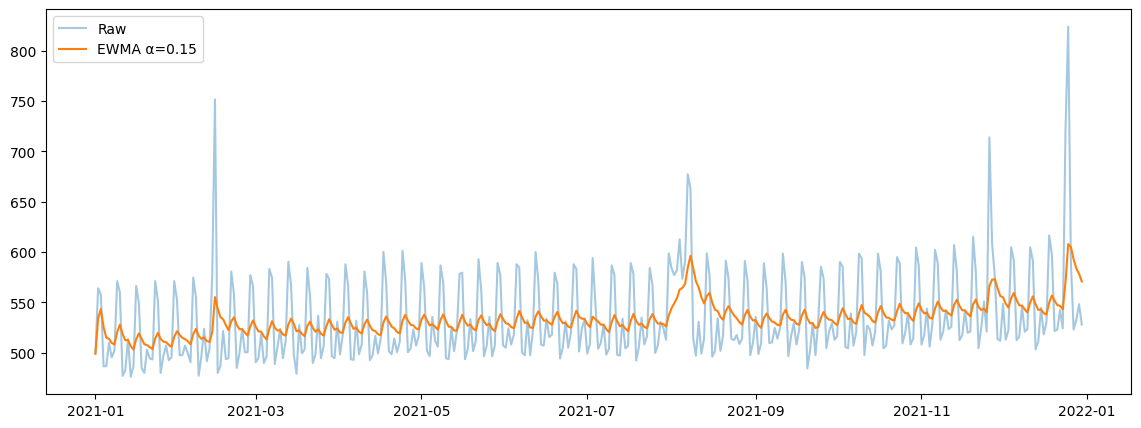

In [257]:
plt.figure(figsize=(14,5))
plt.plot(df2["total_sales"], alpha=0.4, label="Raw")
plt.plot(df2["EWMA_0.15"], label="EWMA α=0.15")
plt.legend()

In [258]:
august_13=df2[df2.index=='2021-08-13']

In [259]:
august_13

,customers,coffee_sold,avg_sale,total_sales,day,total_sales_dow_cummax,MA7,MA30,EWMA_0.2,EWMA_0.05,pred_running,pred_roll,pred_ewma,EWMA_0.15
date,,,,,,,,,,,,,,
2021-08-13,108,80,4.76,514.08,Friday,590.24,556.532857,549.303333,543.173993,544.569722,526.214375,567.412857,550.447491,548.983305


In [260]:
error = abs(august_13['total_sales']-august_13['EWMA_0.15'])

In [261]:
error

,0
date,
2021-08-13,34.903305


##3

In [262]:
df2=df2.rename(columns={'MA7':'pred_roll_mean'})

In [263]:
df2['pred_roll_med'] = df2["total_sales"].rolling(window = 7, min_periods = 1).median()
#df2

In [264]:
#df2

In [265]:
sept_17=df2[df2.index=='2021-09-17']

In [266]:
sept_17

,customers,coffee_sold,avg_sale,total_sales,day,total_sales_dow_cummax,pred_roll_mean,MA30,EWMA_0.2,EWMA_0.05,pred_running,pred_roll,pred_ewma,EWMA_0.15,pred_roll_med
date,,,,,,,,,,,,,,,
2021-09-17,110,84,4.75,522.5,Friday,590.24,534.515714,531.532667,526.138899,533.332118,527.095444,534.877143,527.048623,527.831182,522.5


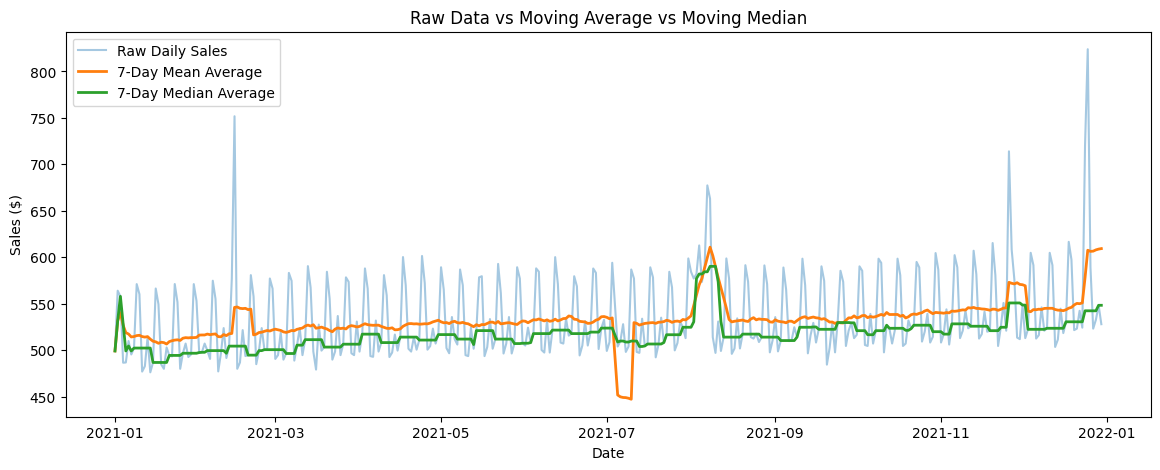

In [267]:
plt.figure(figsize=(14,5))
plt.plot(df2["total_sales"], label="Raw Daily Sales", alpha=0.4)
plt.plot(df2['pred_roll_mean'], label="7-Day Mean Average", linewidth=2)
plt.plot(df2['pred_roll_med'], label="7-Day Median Average", linewidth=2)
plt.title("Raw Data vs Moving Average vs Moving Median")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.legend()
plt.show()

In [268]:
mean_diff= abs(sept_17['total_sales']-sept_17['pred_roll_mean'])
mean_diff

,0
date,
2021-09-17,12.015714


In [269]:
median_diff= abs(sept_17['total_sales']-sept_17['pred_roll_med'])
median_diff

,0
date,
2021-09-17,0.0


##4

In [270]:
#df2

In [271]:
cust_ma= df2['customers'].rolling(window = 14, min_periods = 1).mean()
#cust_ma

In [272]:
cust_ewa= df2['customers'].ewm(alpha=0.10).mean()
cust_ewa2= df2['customers'].ewm(alpha=0.25).mean()
#cust_ewa

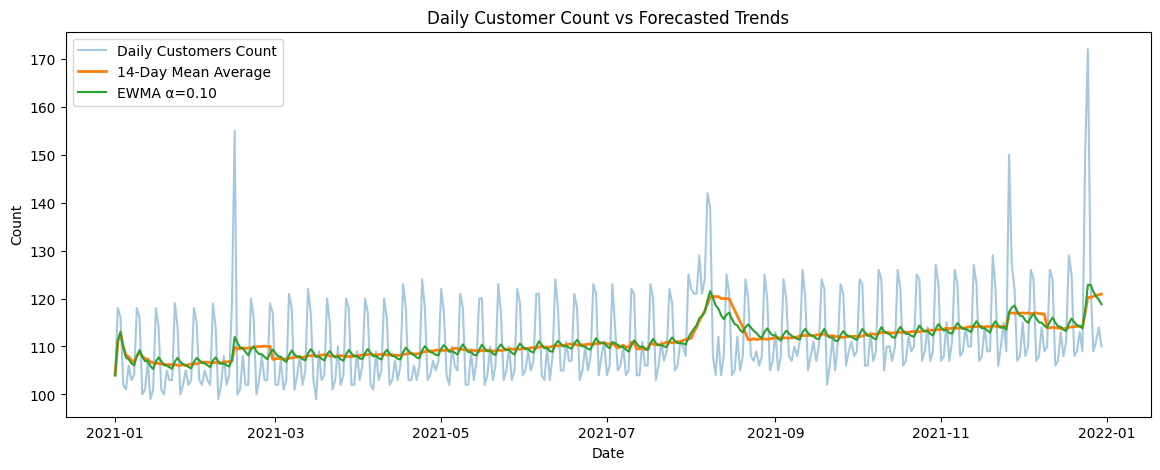

In [273]:
plt.figure(figsize=(14,5))
plt.plot(df2['customers'], label='Daily Customers Count', alpha=0.4)
plt.plot(cust_ma, label='14-Day Mean Average', linewidth=2)
plt.plot(cust_ewa, label='EWMA α=0.10')
plt.title('Daily Customer Count vs Forecasted Trends')
plt.xlabel("Date")
plt.ylabel('Count')
plt.legend()
plt.show()

##5

In [274]:
import numpy as np
cust_ewa= df2['customers'].ewm(alpha=0.10).mean()
cust_ewa2= df2['customers'].ewm(alpha=0.25).mean()

errors = df2['customers'] - cust_ewa
errors2 = df2['customers'] - cust_ewa2
MAPE = (errors.abs() / df['customers']).replace([np.inf,np.nan],0).mean() * 100
MAPE2 = (errors2.abs() / df['customers']).replace([np.inf,np.nan],0).mean() * 100
print(MAPE)
print(MAPE2)

5.478809262031625
4.712170145759009


In refence to the data I used in question #4, having a higher α of .25 compared to .10 drop the MAPE by 0.77 percentage.  Therefore, it made the MAPE better.

##6

In [275]:
dmonth = df2["total_sales"].resample("ME").sum()

In [276]:
dmonth

,total_sales
date,
2021-01-31,15960.57
2021-02-28,14713.72
2021-03-31,16179.02
2021-04-30,15777.59
2021-05-31,16472.81
2021-06-30,15964.00
2021-07-31,15902.57
2021-08-31,17046.04
2021-09-30,15961.92


In [277]:
dmonth.sort_values()

,total_sales
date,
2021-02-28,14713.72
2021-04-30,15777.59
2021-07-31,15902.57
2021-01-31,15960.57
2021-09-30,15961.92
2021-06-30,15964.00
2021-03-31,16179.02
2021-11-30,16443.52
2021-05-31,16472.81


Feburary had the least amount of sales.

<Axes: ylabel='Sales'>

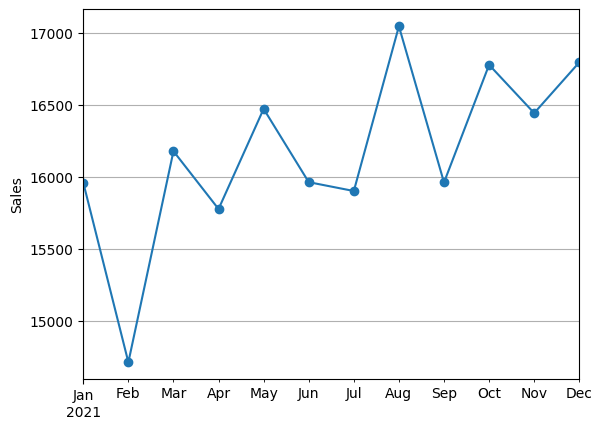

In [278]:
dmonth.plot(kind='line',ylabel='Sales', xlabel='', grid=True, marker='o')

##7

In [279]:
dmonth

,total_sales
date,
2021-01-31,15960.57
2021-02-28,14713.72
2021-03-31,16179.02
2021-04-30,15777.59
2021-05-31,16472.81
2021-06-30,15964.00
2021-07-31,15902.57
2021-08-31,17046.04
2021-09-30,15961.92


In [280]:
cum_max=dmonth.cummax()
cum_max

,total_sales
date,
2021-01-31,15960.57
2021-02-28,15960.57
2021-03-31,16179.02
2021-04-30,16179.02
2021-05-31,16472.81
2021-06-30,16472.81
2021-07-31,16472.81
2021-08-31,17046.04
2021-09-30,17046.04


In [281]:
cum_min=dmonth.cummin()
cum_min

,total_sales
date,
2021-01-31,15960.57
2021-02-28,14713.72
2021-03-31,14713.72
2021-04-30,14713.72
2021-05-31,14713.72
2021-06-30,14713.72
2021-07-31,14713.72
2021-08-31,14713.72
2021-09-30,14713.72


In [282]:
dmonth=dmonth.to_frame()

In [283]:
dmonth['cum_range']=cum_max-cum_min

In [284]:
dmonth

,total_sales,cum_range
date,,
2021-01-31,15960.57,0.00
2021-02-28,14713.72,1246.85
2021-03-31,16179.02,1465.30
2021-04-30,15777.59,1465.30
2021-05-31,16472.81,1759.09
2021-06-30,15964.00,1759.09
2021-07-31,15902.57,1759.09
2021-08-31,17046.04,2332.32
2021-09-30,15961.92,2332.32


<Axes: xlabel='date'>

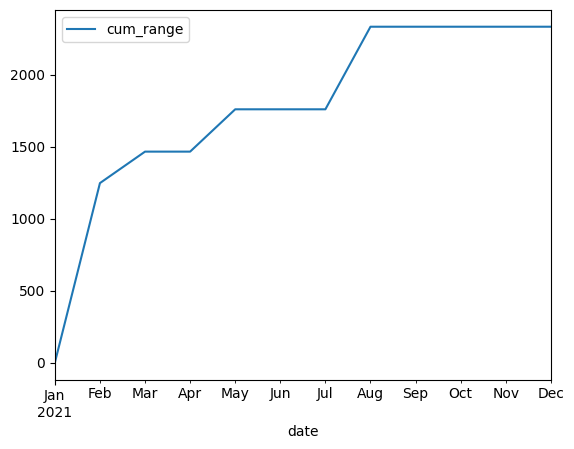

In [285]:
dmonth.plot(y='cum_range')

##8

In [288]:
path = r'https://raw.githubusercontent.com/ncrowder/python/refs/heads/main/timeseries_full.csv'
df_orig = pd.read_csv(path, parse_dates= ['date'])
path2 = r'https://raw.githubusercontent.com/ncrowder/python/refs/heads/main/dec2021_jan2022_adjusted.csv'
df_new = pd.read_csv(path2, parse_dates=['date'])

In [289]:
df_orig

,date,customers,coffee_sold,avg_sale,total_sales
0,2021-01-01,104,78,4.80,499.20
1,2021-01-02,118,97,4.78,564.04
2,2021-01-03,116,93,4.81,557.96
3,2021-01-04,102,71,4.77,486.54
4,2021-01-05,101,71,4.82,486.82
...,...,...,...,...,...
360,2021-12-27,109,76,4.80,523.20
361,2021-12-28,111,79,4.80,532.80
362,2021-12-29,114,84,4.81,548.34
363,2021-12-30,110,78,4.80,528.00


In [290]:
df_new

,date,customers,coffee_sold,avg_sale,total_sales
0,2021-12-01,115,84,4.77,548.55
1,2021-12-02,112,79,4.75,532.00
2,2021-12-03,110,84,4.75,522.50
3,2021-12-04,126,102,4.80,604.80
4,2021-12-05,124,97,4.77,591.48
...,...,...,...,...,...
57,2022-01-27,113,80,4.81,543.53
58,2022-01-28,113,85,4.84,546.92
59,2022-01-29,134,110,4.86,651.24
60,2022-01-30,125,100,4.84,605.00


In [317]:
df_combine=pd.concat([df_orig, df_new])

In [318]:
df_combine=df_combine.drop_duplicates(subset='date')

In [319]:
df_combine

,date,customers,coffee_sold,avg_sale,total_sales
0,2021-01-01,104,78,4.80,499.20
1,2021-01-02,118,97,4.78,564.04
2,2021-01-03,116,93,4.81,557.96
3,2021-01-04,102,71,4.77,486.54
4,2021-01-05,101,71,4.82,486.82
...,...,...,...,...,...
57,2022-01-27,113,80,4.81,543.53
58,2022-01-28,113,85,4.84,546.92
59,2022-01-29,134,110,4.86,651.24
60,2022-01-30,125,100,4.84,605.00


In [320]:
df_combine['date']

,date
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
...,...
57,2022-01-27
58,2022-01-28
59,2022-01-29
60,2022-01-30


In [321]:
df_combine.duplicated().sum()

np.int64(0)

In [322]:
df_combine

,date,customers,coffee_sold,avg_sale,total_sales
0,2021-01-01,104,78,4.80,499.20
1,2021-01-02,118,97,4.78,564.04
2,2021-01-03,116,93,4.81,557.96
3,2021-01-04,102,71,4.77,486.54
4,2021-01-05,101,71,4.82,486.82
...,...,...,...,...,...
57,2022-01-27,113,80,4.81,543.53
58,2022-01-28,113,85,4.84,546.92
59,2022-01-29,134,110,4.86,651.24
60,2022-01-30,125,100,4.84,605.00


In [323]:
df_combine["EWMA_0.15"] = df_combine["total_sales"].ewm(alpha=0.15).mean()

In [330]:
df_combine=df_combine.set_index('date')

In [331]:
df_combine

,customers,coffee_sold,avg_sale,total_sales,EWMA_0.15
date,,,,,
2021-01-01,104,78,4.80,499.20,499.200000
2021-01-02,118,97,4.78,564.04,534.248649
2021-01-03,116,93,4.81,557.96,543.465889
2021-01-04,102,71,4.77,486.54,525.601883
2021-01-05,101,71,4.82,486.82,515.144687
...,...,...,...,...,...
2022-01-27,113,80,4.81,543.53,556.334642
2022-01-28,113,85,4.84,546.92,554.922446
2022-01-29,134,110,4.86,651.24,569.370079


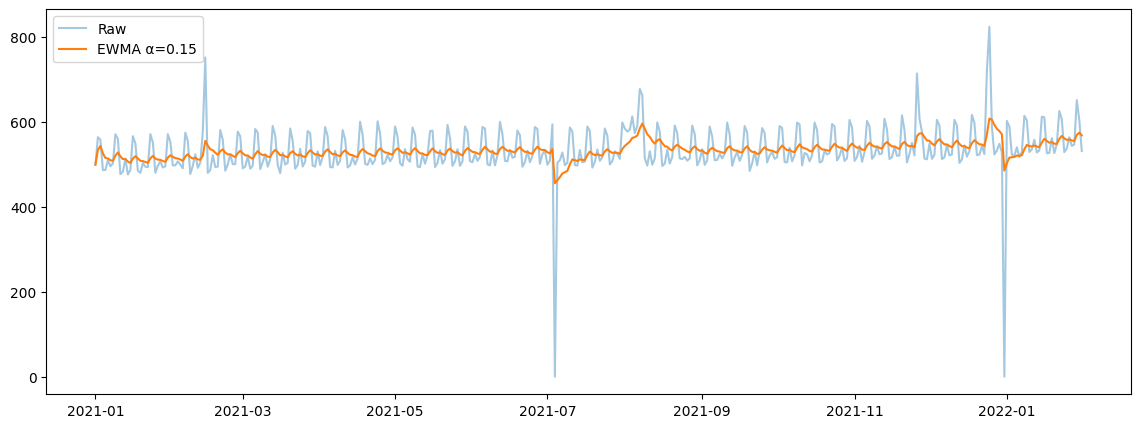

In [332]:
plt.figure(figsize=(14,5))
plt.plot(df_combine["total_sales"], alpha=0.4, label="Raw")
plt.plot(df_combine["EWMA_0.15"], label="EWMA α=0.15")
plt.legend()

In [333]:
august_13_combine=df_combine[df_combine.index=='2021-08-13']

In [334]:
august_13_combine

,customers,coffee_sold,avg_sale,total_sales,EWMA_0.15
date,,,,,
2021-08-13,108,80,4.76,514.08,548.862548


In [335]:
error= august_13_combine['total_sales']- august_13_combine['EWMA_0.15']

In [337]:
error.abs()

,0
date,
2021-08-13,34.782548
